In [146]:
# Importing the required libraries

from numpy import sqrt, pi, cos, exp, e
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import rand
from numpy.random import seed

from numpy import arange
from numpy import asarray
from numpy import meshgrid
from matplotlib import pyplot

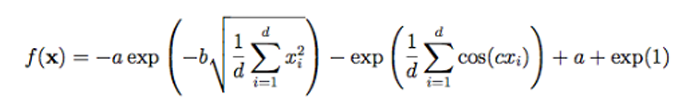

In [147]:
# Defining the objective function with the given values

def objective(x, y):
    a = 20
    b = 0.2
    c = 2 * pi
    d = 2
    return (
        (-1 * a) * exp((-1 * b) * sqrt((1 / d) * (x**2 + y**2)))
        - exp((1 / d) * (cos(c * x) + cos(c * y)))
        + a
        + e
    )

C:\Users\Peeyush Agarwal\AppData\Local\Temp\ipykernel_4220\3370244587.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


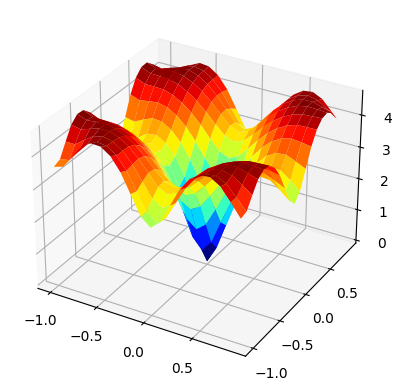

In [148]:
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [149]:
# The gradient of the Ackley function using numerical differentiation

def derivative(x, y):
    h = 1e-5
    gradient_x = (objective(x + h, y) - objective(x, y)) / h
    gradient_y = (objective(x, y + h) - objective(x, y)) / h
    return asarray([gradient_x, gradient_y])


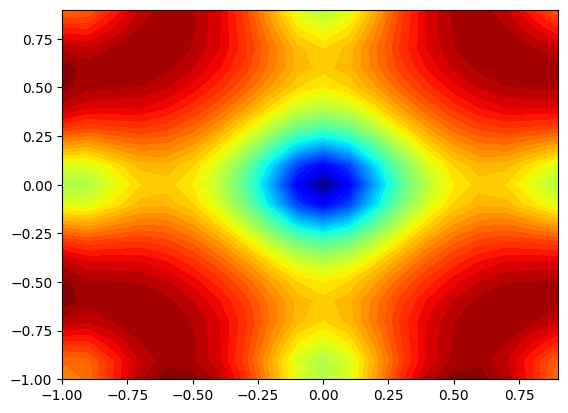

In [150]:
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

In [151]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
	solutions = []
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	scores=[]
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(bounds.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
			x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
		# evaluate candidate point
		score = objective(x[0], x[1])
		# keep track of solutions
		solutions.append(x.copy())
		scores.append(score)
		
		
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return x,scores,solutions

In [152]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 600
# steps size
alpha = 1e-3
# factor for average gradient
beta1 = 0.01
# factor for average squared gradient
beta2 = 0.02
# perform the gradient descent search with adam
best, scores, solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

>0 f([-0.16495599  0.43964899]) = 3.19259
>1 f([-0.163956    0.43864893]) = 3.18604
>2 f([-0.16295601  0.43764887]) = 3.17947
>3 f([-0.16195602  0.43664881]) = 3.17288
>4 f([-0.16095603  0.43564875]) = 3.16628
>5 f([-0.15995604  0.43464869]) = 3.15966
>6 f([-0.15895605  0.43364863]) = 3.15302
>7 f([-0.15795606  0.43264857]) = 3.14636
>8 f([-0.15695607  0.43164851]) = 3.13969
>9 f([-0.15595608  0.43064845]) = 3.13300
>10 f([-0.15495609  0.42964839]) = 3.12629
>11 f([-0.15395611  0.42864833]) = 3.11957
>12 f([-0.15295612  0.42764827]) = 3.11282
>13 f([-0.15195613  0.42664821]) = 3.10606
>14 f([-0.15095615  0.42564815]) = 3.09929
>15 f([-0.14995616  0.42464809]) = 3.09249
>16 f([-0.14895618  0.42364804]) = 3.08568
>17 f([-0.14795619  0.42264798]) = 3.07885
>18 f([-0.14695621  0.42164792]) = 3.07201
>19 f([-0.14595622  0.42064786]) = 3.06514
>20 f([-0.14495624  0.4196478 ]) = 3.05826
>21 f([-0.14395626  0.41864774]) = 3.05137
>22 f([-0.14295628  0.41764768]) = 3.04445
>23 f([-0.14195629  0

In [153]:
solutions

[array([-0.16495599,  0.43964899]),
 array([-0.163956  ,  0.43864893]),
 array([-0.16295601,  0.43764887]),
 array([-0.16195602,  0.43664881]),
 array([-0.16095603,  0.43564875]),
 array([-0.15995604,  0.43464869]),
 array([-0.15895605,  0.43364863]),
 array([-0.15795606,  0.43264857]),
 array([-0.15695607,  0.43164851]),
 array([-0.15595608,  0.43064845]),
 array([-0.15495609,  0.42964839]),
 array([-0.15395611,  0.42864833]),
 array([-0.15295612,  0.42764827]),
 array([-0.15195613,  0.42664821]),
 array([-0.15095615,  0.42564815]),
 array([-0.14995616,  0.42464809]),
 array([-0.14895618,  0.42364804]),
 array([-0.14795619,  0.42264798]),
 array([-0.14695621,  0.42164792]),
 array([-0.14595622,  0.42064786]),
 array([-0.14495624,  0.4196478 ]),
 array([-0.14395626,  0.41864774]),
 array([-0.14295628,  0.41764768]),
 array([-0.14195629,  0.41664762]),
 array([-0.14095631,  0.41564756]),
 array([-0.13995633,  0.4146475 ]),
 array([-0.13895635,  0.41364745]),
 array([-0.13795637,  0.4126

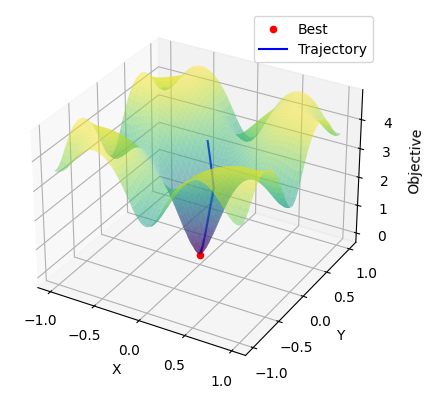

In [154]:

x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)
 
# Plot the optimization trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(best[0], best[1], objective(best[0], best[1]),
           color='red', label='Best')
ax.plot([point[0] for point in solutions],
        [point[1] for point in solutions], scores,
        color='blue', label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective')
ax.legend()
 
# Show the plot
plt.show()

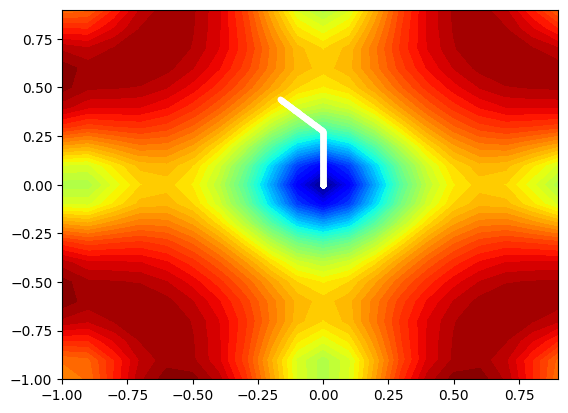

In [155]:
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

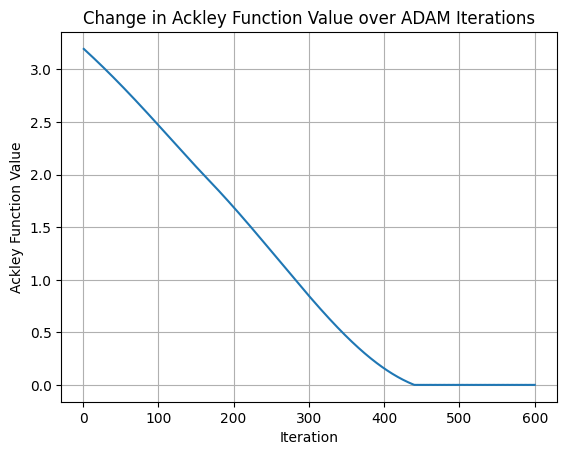

In [156]:
vals = []
for i in range(600):
    vals.append(objective(solutions[i][0], solutions[i][1]))
plt.plot(range(1, 601), vals)
plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over ADAM Iterations")
plt.grid(True)

#ADAN IMPLEMENTATION

In [157]:
def adan(objective, derivative, bounds, n_iter, alpha, beta1, beta2, beta3, decay, eps=1e-8):
	solutions_adan = []
	scores=[]
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	n=  [0.0 for _ in range(bounds.shape[0])]
	neta=[alpha for _ in range(bounds.shape[0])]
	prev=[0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(bounds.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = (1-beta1) * m[i] + (beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = (1-beta2) * v[i] + beta2 * (g[i]-prev[i])
			
			n[i] = (1-beta3) * n[i] + beta3 *((g[i]+((1-beta2)*((g[i]-prev[i]))))**2)

			# correct_m, correct_v, correct_n = map(lambda n: 1 / (1 - (1 - n) ** (t+1)), (beta1, beta2, beta3))
			correct_n=n[i]*(1 - (1 - beta3) ** (t+1))
			correct_m=m[i]*(1 - (1 - beta1) ** (t+1))
			correct_v=v[i]*(1 - (1 - beta2) ** (t+1))

			# correct_n=
			neta[i]= alpha/(sqrt(correct_n)+eps)

			# mhat(t) = m(t) / (1 - beta1(t))
			# mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			# vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
			x[i] = (x[i]-(neta[i]*(correct_m+((1-beta2)*correct_v))))/(1+(decay*alpha))
		# evaluate candidate point
		score = objective(x[0], x[1])
		# keep track of solutions
		solutions_adan.append(x.copy())
		scores.append(score)
		prev=g
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return x,scores,solutions_adan

In [164]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 600
# steps size
alpha =1e-3
# factor for average gradient
beta1 = 0.02
# factor for average squared gradient
beta2 = 0.08
# perform the gradient descent search with adam
beta3=0.01
decay=0.001
x,scores, solutions_adan = adan(objective, derivative, bounds, n_iter, alpha, beta1, beta2,beta3,decay)

>0 f([-0.16562833  0.44032105]) = 3.19698
>1 f([-0.16523475  0.43992668]) = 3.19441
>2 f([-0.16481199  0.43950245]) = 3.19164
>3 f([-0.16437339  0.43906166]) = 3.18876
>4 f([-0.16392425  0.4386096 ]) = 3.18580
>5 f([-0.16346646  0.4381482 ]) = 3.18279
>6 f([-0.16300032  0.43767779]) = 3.17971
>7 f([-0.16252538  0.43719797]) = 3.17657
>8 f([-0.16204088  0.43670798]) = 3.17335
>9 f([-0.1615459   0.43620697]) = 3.17007
>10 f([-0.16103955  0.43569406]) = 3.16670
>11 f([-0.16052098  0.43516842]) = 3.16324
>12 f([-0.15998945  0.43462932]) = 3.15969
>13 f([-0.1594443   0.43407613]) = 3.15605
>14 f([-0.15888498  0.43350832]) = 3.15230
>15 f([-0.15831105  0.43292546]) = 3.14845
>16 f([-0.15772217  0.43232721]) = 3.14449
>17 f([-0.15711807  0.43171332]) = 3.14042
>18 f([-0.15649858  0.43108362]) = 3.13625
>19 f([-0.1558636   0.43043801]) = 3.13195
>20 f([-0.15521308  0.42977647]) = 3.12755
>21 f([-0.15454705  0.42909901]) = 3.12303
>22 f([-0.15386557  0.4284057 ]) = 3.11840
>23 f([-0.15316875  0

In [159]:
solutions_adan

[array([-0.16562849,  0.44032149]),
 array([-0.16523508,  0.43992756]),
 array([-0.16481249,  0.43950377]),
 array([-0.16437405,  0.43906342]),
 array([-0.16392508,  0.4386118 ]),
 array([-0.16346745,  0.43815084]),
 array([-0.16300147,  0.43768087]),
 array([-0.1625267 ,  0.43720149]),
 array([-0.16204235,  0.43671195]),
 array([-0.16154754,  0.43621138]),
 array([-0.16104135,  0.4356989 ]),
 array([-0.16052295,  0.4351737 ]),
 array([-0.15999157,  0.43463505]),
 array([-0.15944658,  0.4340823 ]),
 array([-0.15888742,  0.43351493]),
 array([-0.15831365,  0.4329325 ]),
 array([-0.15772493,  0.43233469]),
 array([-0.15712099,  0.43172124]),
 array([-0.15650166,  0.43109197]),
 array([-0.15586683,  0.43044681]),
 array([-0.15521647,  0.4297857 ]),
 array([-0.15455059,  0.42910867]),
 array([-0.15386927,  0.42841579]),
 array([-0.15317261,  0.42770719]),
 array([-0.15246076,  0.426983  ]),
 array([-0.15173391,  0.42624341]),
 array([-0.15099226,  0.42548863]),
 array([-0.15023606,  0.4247

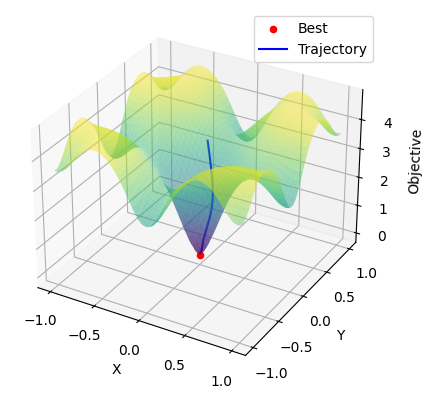

In [160]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)
 
# Plot the optimization trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(best[0], best[1], objective(best[0], best[1]),
           color='red', label='Best')
ax.plot([point[0] for point in solutions_adan],
        [point[1] for point in solutions_adan], scores,
        color='blue', label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective')
ax.legend()
 
# Show the plot
plt.show()

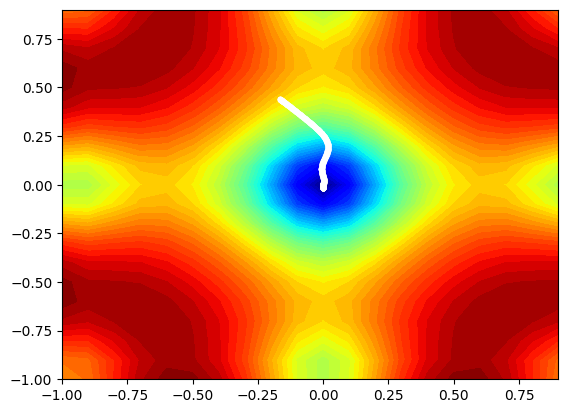

In [161]:
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions_adan)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

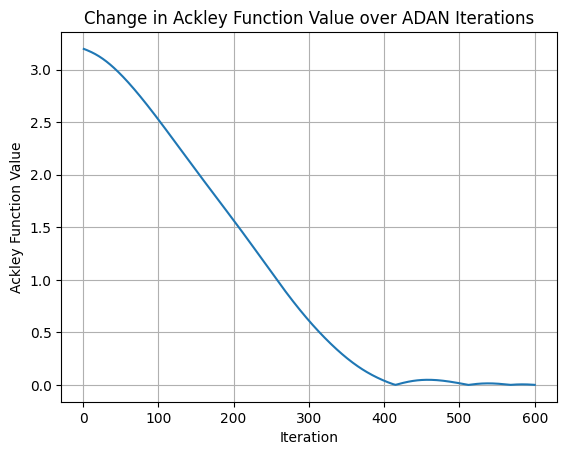

In [162]:
vals = []
for i in range(600):
    vals.append(objective(solutions_adan[i][0], solutions_adan[i][1]))
plt.plot(range(1, 601), vals)
plt.xlabel("Iteration")
plt.ylabel("Ackley Function Value")
plt.title("Change in Ackley Function Value over ADAN Iterations")
plt.grid(True)